<a href="https://colab.research.google.com/github/leynessa/BImaster_final/blob/main/PUC_finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fracture Detection in X-ray Images using Data Augmentation for improvement of model**



## **Abstract**
This project aims to develop a robust machine learning model for detecting fractures in X-ray images, leveraging data augmentation techniques to improve model performance. Using the EfficientNetB0 architecture, various augmentation strategies were employed and evaluated to understand their impact on the model’s accuracy and generalization. The dataset was split into training, validation, and testing subsets, and the results demonstrated the effectiveness of specific augmentations in enhancing the model’s capability to detect fractures.


## **Introduction**
Fracture detection in X-ray images is limited to the availability of annotated datasets which presents a significant challenge for training deep learning models. Data augmentation, a technique to artificially increase dataset diversity, has been widely adopted to address this issue. This project explores the impact of different augmentation techniques on the performance of a fracture detection model built using EfficientNetB0.


### **Dataset**
The dataset consists of 4,083 X-ray images divided into two classes:

•	Fractured

•	Non-Fractured
### **Data Distribution:**
•	Training Set: 2,448 images

•	Validation Set: 817 images

•	Test Set: 818 images


#**Project Definition & Goal**

**Goal**: Build a machine learning model to detect fractures in X-ray images using data augmentation techniques for improvements



**Output:** A binary classification model that labels X-ray images as "fractured" or "non-fractured"

## **Model Architecture**
The EfficientNetB0 architecture was chosen for its efficiency and high performance on image classification tasks. .



# **Data Augmentation Techniques**

Data augmentation techniques play a critical role in enhancing the diversity and quality of datasets for machine learning models. Basic augmentation techniques include geometric transformations such as rotation, scaling, translation, reflection, shearing, and perspective changes. These methods can also involve cropping, where random patches are selected, or occlusion, which simulates incomplete images by removing parts of them. Intensity operations, such as brightness adjustment, contrast modification, and gamma correction, are also commonly used. Additionally, noise injection techniques introduce Gaussian or salt-and-pepper noise to simulate real-world imperfections, while filtering methods like sharpening, blurring, or smoothing are applied to alter image quality.

Deformable augmentation techniques extend the basic methods by introducing randomized displacement fields, which apply elastic deformations using Gaussian filters. Spline interpolation creates smooth deformations through mathematical functions, and deformable image registration aligns images from different modalities, such as CT and MRI. Another advanced approach is statistical shape modeling, which generates augmentations based on learned anatomical variations.

Deep learning-based techniques further expand the possibilities for augmentation. Generative Adversarial Networks (GANs), such as CycleGAN and Pix2Pix, synthesize realistic images, while variational autoencoders create diverse yet plausible variations.

Other augmentation techniques include artifact simulation, where motion or imaging artifacts are introduced to mimic real-world conditions, and parameter variation, which adjusts scanner-specific properties like slice thickness or energy spectra. These advanced techniques ensure that models are trained on data that closely resembles real-world scenarios, improving their performance and generalizability.

# **Methodology**
The methodology for this project involved three key phases: data preparation, augmentation experiments, and model training.

## **1. Data Preparation**
Images in the dataset were resized to a consistent dimension of 224x224 pixels to match the input size requirement of the EfficientNetB0 model. The dataset was then divided into three subsets: training, validation, and test sets, ensuring proper data distribution for model development and evaluation.

2. Augmentation Experiments
To enhance dataset diversity and evaluate the impact of various augmentation techniques, multiple strategies were applied using TensorFlow ImageDataGenerator and the Albumentations library. Each augmentation technique was tested individually by training the model separately with that specific method. This allowed for a detailed analysis of how each augmentation type influenced the model's performance.

## **3. Model Training**
The model was trained using the Adam optimizer with a learning rate of 1e-4. Binary cross-entropy was used as the loss function, and accuracy was employed as the primary evaluation metric. To improve the efficiency and robustness of the training process, callbacks such as EarlyStopping, to prevent overfitting, and ModelCheckpoint, to save the best-performing model, were implemented.

This structured approach ensured a comprehensive evaluation of data augmentation techniques and their impact on model performance.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install opencv-python matplotlib scikit-learn

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import h5py
import torch
import cv2
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np
import cv2
import os

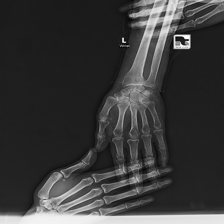

In [4]:
from PIL import Image
img = Image.open('/content/drive/MyDrive/atlas/images/Fractured/IMG0000019.jpg')
resized = img.resize((224, 224))
resized

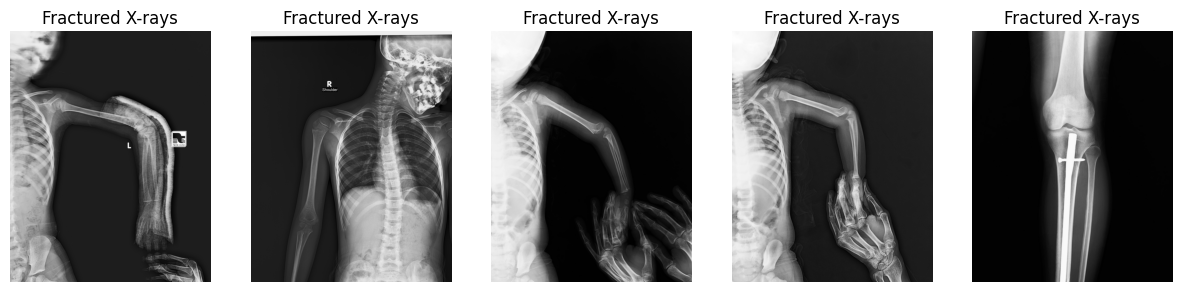

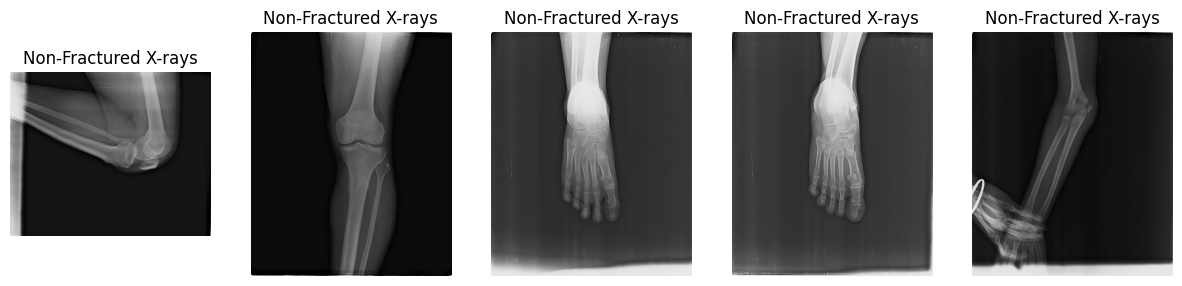

In [5]:
# Define paths to folders
fractured_path = "/content/drive/MyDrive/atlas/images/Fractured"
non_fractured_path = "/content/drive/MyDrive/atlas/images/Non_fractured"

# Visualize images
def visualize_images(folder_path, title, num_images=5):
    images = os.listdir(folder_path)[:num_images]
    plt.figure(figsize=(15, 5))
    for i, image_file in enumerate(images):
        image_path = os.path.join(folder_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(title)
        plt.axis("off")
    plt.show()

# Show samples
visualize_images(fractured_path, "Fractured X-rays")
visualize_images(non_fractured_path, "Non-Fractured X-rays")

In [6]:
!pip install pycocotools

loading annotations into memory...
Done (t=7.46s)
creating index...
index created!


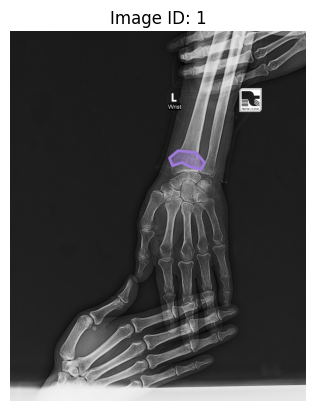

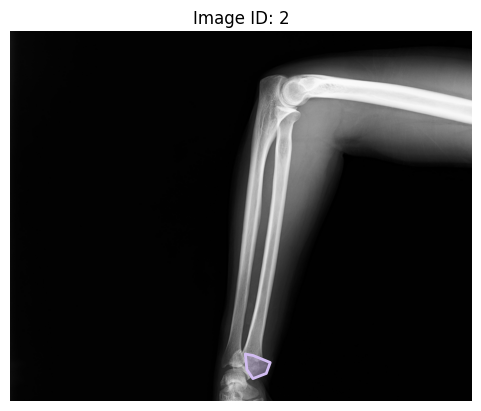

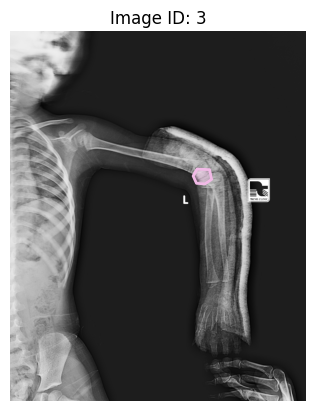

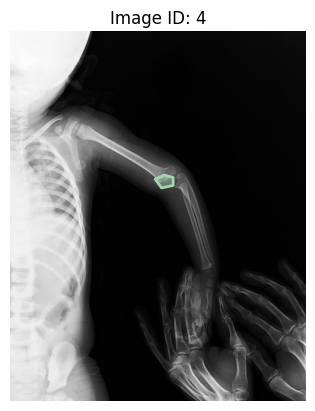

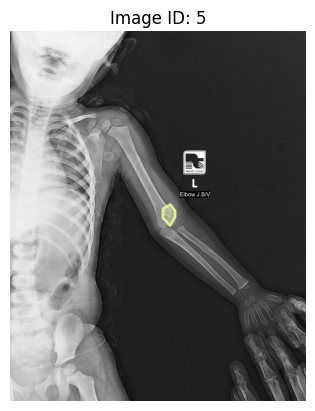

In [7]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import cv2
import os

# Load COCO annotations
coco = COCO("/content/drive/MyDrive/atlas/Annotations/COCO_JSON/COCO_fracture_masks.json")

# Visualize an image with annotations
def visualize_coco(image_folder, image_id):
    # Get image info
    img_info = coco.loadImgs(image_id)[0]
    image_path = os.path.join(image_folder, img_info['file_name'])

    # Load and prepare image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load image at {image_path}")
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display image
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Image ID: {image_id}")

    # Load and show annotations
    ann_ids = coco.getAnnIds(imgIds=img_info['id'])
    anns = coco.loadAnns(ann_ids)
    coco.showAnns(anns)
    plt.show()

# Visualize the first 20 images
def visualize_multiple_images(image_folder, num_images=20):
    image_ids = list(coco.getImgIds())[:num_images]
    for image_id in image_ids:
        visualize_coco(image_folder, image_id)

# Example usage
image_folder_fractured = "/content/drive/MyDrive/atlas/images/Fractured"
image_folder_nonfractured = "/content/drive/MyDrive/atlas/images/Non_fractured"
visualize_multiple_images(image_folder_fractured, num_images=5)

In [8]:
visualize_multiple_images(image_folder_nonfractured, num_images=5)

Error: Could not load image at /content/drive/MyDrive/atlas/images/Non_fractured/IMG0000019.jpg
Error: Could not load image at /content/drive/MyDrive/atlas/images/Non_fractured/IMG0000025.jpg
Error: Could not load image at /content/drive/MyDrive/atlas/images/Non_fractured/IMG0000044.jpg
Error: Could not load image at /content/drive/MyDrive/atlas/images/Non_fractured/IMG0000057.jpg
Error: Could not load image at /content/drive/MyDrive/atlas/images/Non_fractured/IMG0000058.jpg


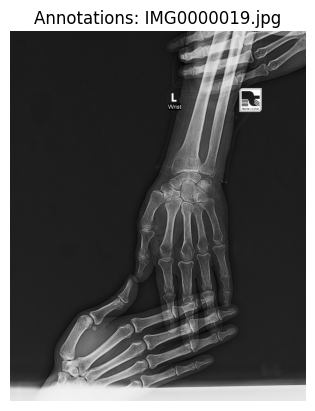

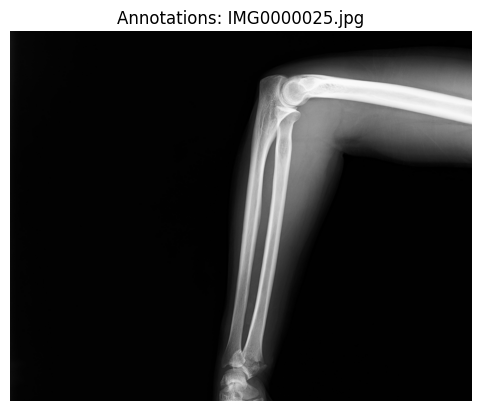

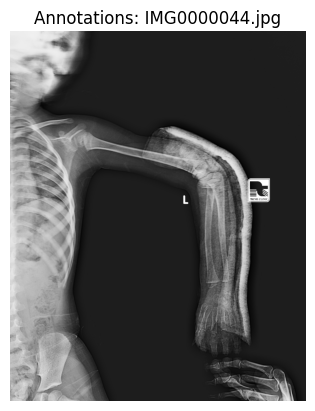

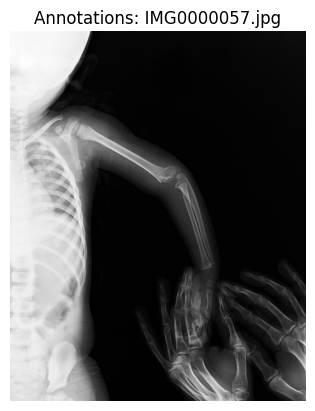

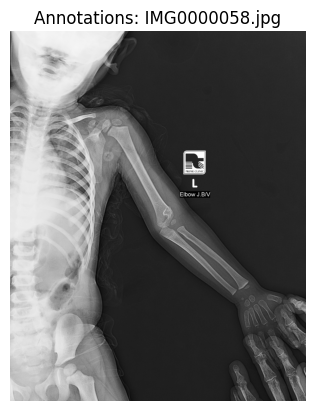

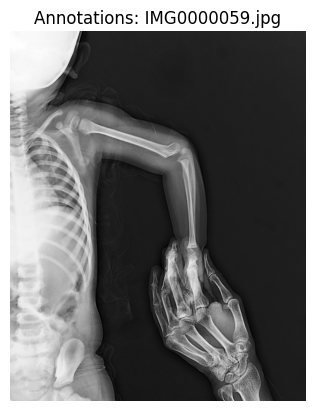

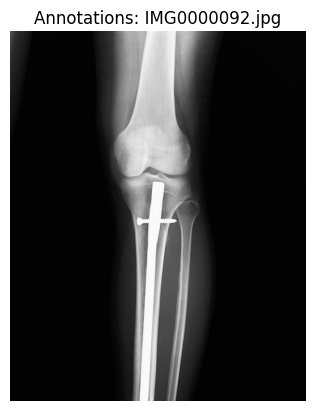

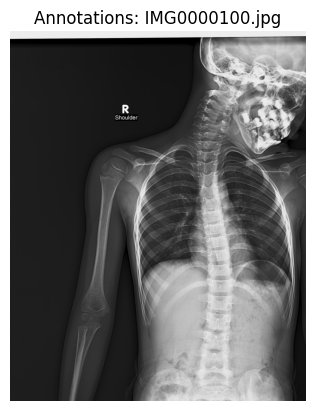

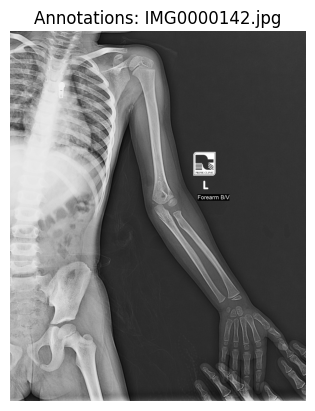

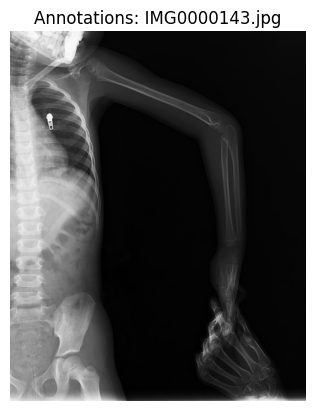

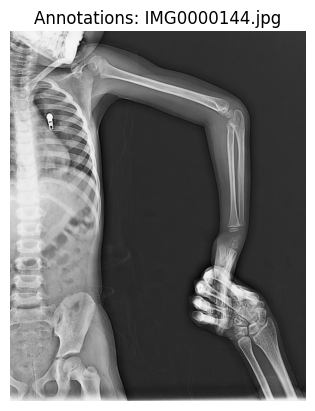

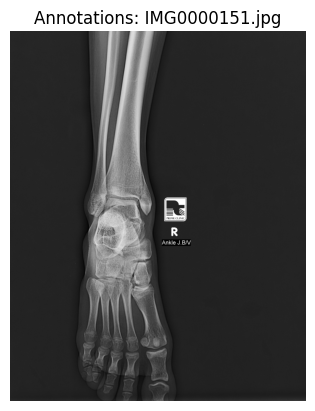

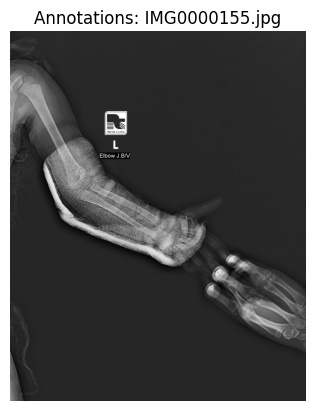

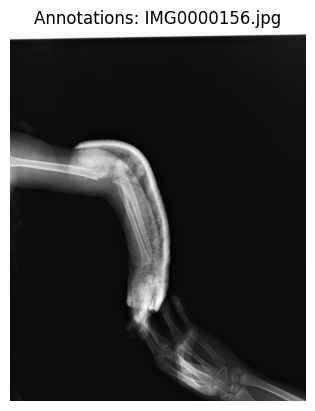

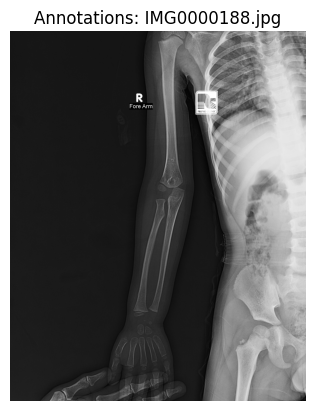

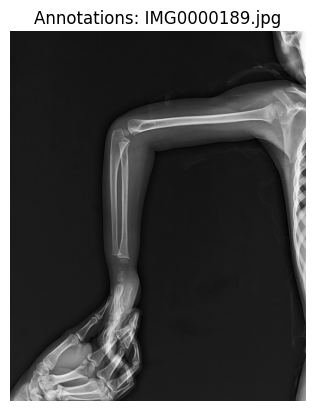

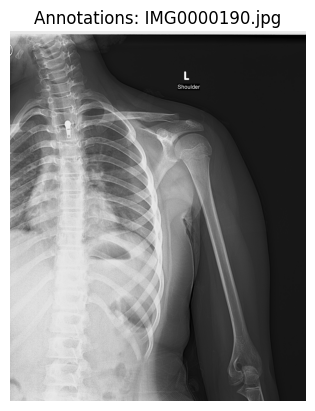

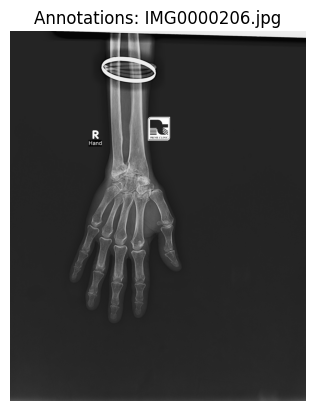

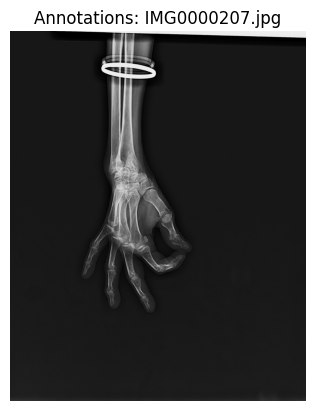

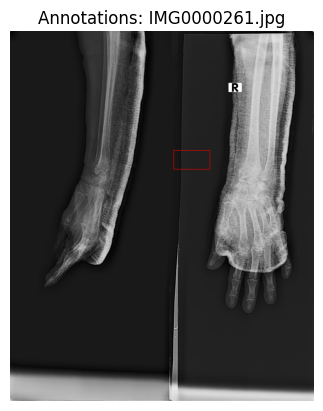

In [9]:
import os
import cv2
import matplotlib.pyplot as plt

# Function to parse YOLO annotations
def parse_yolo(annotation_path, image_shape):
    boxes = []
    with open(annotation_path, "r") as f:
        for line in f:
            parts = line.strip().split()
            class_id, x_center, y_center, width, height = map(float, parts)
            x_center *= image_shape[1]
            y_center *= image_shape[0]
            width *= image_shape[1]
            height *= image_shape[0]
            xmin = int(x_center - width / 2)
            ymin = int(y_center - height / 2)
            xmax = int(x_center + width / 2)
            ymax = int(y_center + height / 2)
            boxes.append((xmin, ymin, xmax, ymax))
    return boxes

# Function to visualize annotations
def visualize_yolo(image_path, annotation_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load image at {image_path}")
        return

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    boxes = parse_yolo(annotation_path, img.shape)

    for (xmin, ymin, xmax, ymax) in boxes:
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)

    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Annotations: {os.path.basename(image_path)}")
    plt.show()

# Visualize annotations for multiple images
def visualize_multiple_images(image_folder, annotation_folder, num_images=20):
    image_files = sorted(os.listdir(image_folder))[:num_images]
    annotation_files = sorted(os.listdir(annotation_folder))[:num_images]

    for img_file, ann_file in zip(image_files, annotation_files):
        image_path = os.path.join(image_folder, img_file)
        annotation_path = os.path.join(annotation_folder, ann_file)
        visualize_yolo(image_path, annotation_path)

# Example usage
image_folder = "/content/drive/MyDrive/atlas/images/Fractured"
annotation_folder = "/content/drive/MyDrive/atlas/Annotations/YOLO"
visualize_multiple_images(image_folder, annotation_folder, num_images=20)


In [10]:
data=  pd.read_csv('/content/drive/MyDrive/atlas/dataset.csv')

In [11]:
data.head(20)

,image_id,hand,leg,hip,shoulder,mixed,hardware,multiscan,fractured,fracture_count,frontal,lateral,oblique
0,IMG0000000.jpg,0,1,0,0,0,0,1,0,0,1,1,0
1,IMG0000001.jpg,0,1,0,0,0,0,1,0,0,1,1,0
2,IMG0000002.jpg,0,1,0,0,0,0,1,0,0,1,1,0
3,IMG0000003.jpg,0,1,0,0,0,0,1,0,0,0,1,1
4,IMG0000004.jpg,0,1,0,0,0,0,1,0,0,0,1,1
5,IMG0000005.jpg,0,1,0,0,0,0,1,0,0,0,1,1
6,IMG0000006.jpg,1,0,0,0,0,0,1,0,0,0,1,1
7,IMG0000007.jpg,1,0,0,0,0,0,0,0,0,0,0,1
8,IMG0000008.jpg,0,1,0,0,0,0,1,0,0,0,1,1
9,IMG0000009.jpg,0,1,0,0,0,0,0,0,0,0,0,1


 Splitting the Data

In [12]:
import os
from sklearn.model_selection import train_test_split
import shutil

# Paths to fractured and non-fractured folders
fractured_path = "/content/drive/MyDrive/atlas/images/Fractured"
non_fractured_path = "/content/drive/MyDrive/atlas/images/Non_fractured"

# Create new folders for train, validation, and test
base_dir = "/content/drive/MyDrive/atlas/split_data"
os.makedirs(base_dir, exist_ok=True)

for subset in ['train', 'val', 'test']:
    os.makedirs(os.path.join(base_dir, subset, 'fractured'), exist_ok=True)
    os.makedirs(os.path.join(base_dir, subset, 'non_fractured'), exist_ok=True)

# Helper function to split and copy files
def split_and_copy(files, dest_dir):
    for file in files:
        shutil.copy(file, dest_dir)

# Get all file paths
fractured_files = [os.path.join(fractured_path, f) for f in os.listdir(fractured_path)]
non_fractured_files = [os.path.join(non_fractured_path, f) for f in os.listdir(non_fractured_path)]

# Split files
fractured_train, fractured_test = train_test_split(fractured_files, test_size=0.2, random_state=42)
fractured_train, fractured_val = train_test_split(fractured_train, test_size=0.25, random_state=42)  # 20% val

non_fractured_train, non_fractured_test = train_test_split(non_fractured_files, test_size=0.2, random_state=42)
non_fractured_train, non_fractured_val = train_test_split(non_fractured_train, test_size=0.25, random_state=42)

# Copy files to respective folders
split_and_copy(fractured_train, os.path.join(base_dir, 'train', 'fractured'))
split_and_copy(fractured_val, os.path.join(base_dir, 'val', 'fractured'))
split_and_copy(fractured_test, os.path.join(base_dir, 'test', 'fractured'))

split_and_copy(non_fractured_train, os.path.join(base_dir, 'train', 'non_fractured'))
split_and_copy(non_fractured_val, os.path.join(base_dir, 'val', 'non_fractured'))
split_and_copy(non_fractured_test, os.path.join(base_dir, 'test', 'non_fractured'))




In [13]:
# Count files in each folder
for subset in ['train', 'val', 'test']:
    fractured_count = len(os.listdir(os.path.join(base_dir, subset, 'fractured')))
    non_fractured_count = len(os.listdir(os.path.join(base_dir, subset, 'non_fractured')))
    print(f"{subset.capitalize()} set: {fractured_count} fractured, {non_fractured_count} non-fractured")

Train set: 429 fractured, 2019 non-fractured
Val set: 144 fractured, 673 non-fractured
Test set: 144 fractured, 674 non-fractured


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define ImageDataGenerator with augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load train, validation, and test data
train_gen = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_gen = val_test_datagen.flow_from_directory(
    os.path.join(base_dir, 'val'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_gen = val_test_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # For consistent predictions during evaluation
)




Found 2448 images belonging to 2 classes.
Found 817 images belonging to 2 classes.
Found 818 images belonging to 2 classes.


In [15]:
"Define the Model"
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load EfficientNet base model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)  # Regularization
output = Dense(1, activation='sigmoid')(x)  # Binary classification (fracture vs non-fracture)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 224, 224, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 4,050,852 (15.45 MB)

 Trainable params: 4,008,829 (15.29 MB)

 Non-trainable params: 42,023 (164.16 KB)

None


In [16]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('efficientnet_best_model.keras', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    train_gen,
    epochs=300,
    validation_data=val_gen,
    callbacks=[early_stop, checkpoint],
    steps_per_epoch=train_gen.samples // train_gen.batch_size,
    validation_steps=val_gen.samples // val_gen.batch_size
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/300
76/76 ━━━━━━━━━━━━━━━━━━━━ 1031s 13s/step - accuracy: 0.6627 - loss: 0.5969 - val_accuracy: 0.1762 - val_loss: 0.7699
Epoch 2/300
 1/76 ━━━━━━━━━━━━━━━━━━━━ 11:54 10s/step - accuracy: 0.7500 - loss: 0.4171

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


76/76 ━━━━━━━━━━━━━━━━━━━━ 78s 913ms/step - accuracy: 0.7500 - loss: 0.4171 - val_accuracy: 0.1750 - val_loss: 0.7676
Epoch 3/300
76/76 ━━━━━━━━━━━━━━━━━━━━ 1042s 13s/step - accuracy: 0.8463 - loss: 0.3614 - val_accuracy: 0.1762 - val_loss: 0.8440
Epoch 4/300
76/76 ━━━━━━━━━━━━━━━━━━━━ 81s 955ms/step - accuracy: 0.7812 - loss: 0.3703 - val_accuracy: 0.1762 - val_loss: 0.8440
Epoch 5/300
76/76 ━━━━━━━━━━━━━━━━━━━━ 982s 12s/step - accuracy: 0.8539 - loss: 0.3323 - val_accuracy: 0.1838 - val_loss: 0.7307
Epoch 6/300
76/76 ━━━━━━━━━━━━━━━━━━━━ 81s 945ms/step - accuracy: 0.8438 - loss: 0.3675 - val_accuracy: 0.1863 - val_loss: 0.7308
Epoch 7/300
76/76 ━━━━━━━━━━━━━━━━━━━━ 983s 13s/step - accuracy: 0.8592 - loss: 0.3256 - val_accuracy: 0.3063 - val_loss: 0.7407
Epoch 8/300
76/76 ━━━━━━━━━━━━━━━━━━━━ 82s 932ms/step - accuracy: 0.8125 - loss: 0.3365 - val_accuracy: 0.3137 - val_loss: 0.7401
Epoch 9/300
76/76 ━━━━━━━━━━━━━━━━━━━━ 933s 12s/step - accuracy: 0.8847 - loss: 0.2767 - val_accuracy: 0

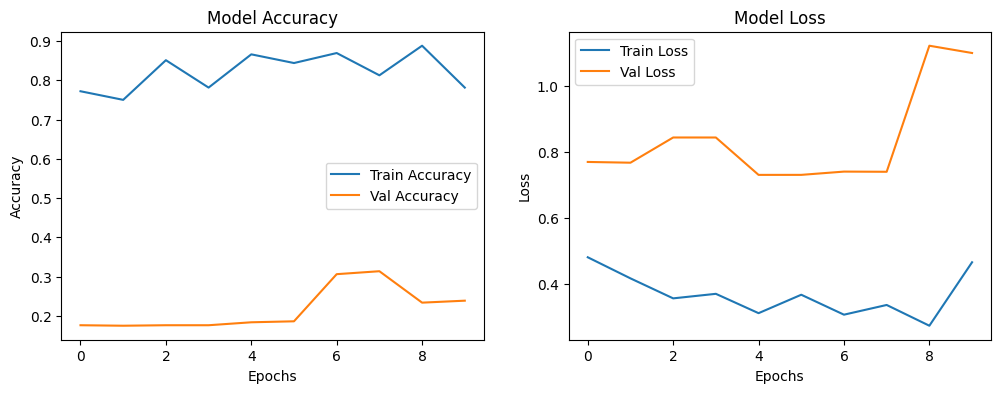

In [18]:
# Plot training history
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history)


In [19]:
import numpy as np

# Reset test generator to ensure predictions are aligned with data
test_gen.reset()

# Predict on the test set
predictions = model.predict(test_gen, steps=test_gen.samples // test_gen.batch_size, verbose=1)

# Convert probabilities to binary classes (0 or 1)
predicted_classes = (predictions > 0.5).astype("int32").flatten()

# True labels from the test generator
true_classes = test_gen.classes[:len(predicted_classes)]

25/25 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step


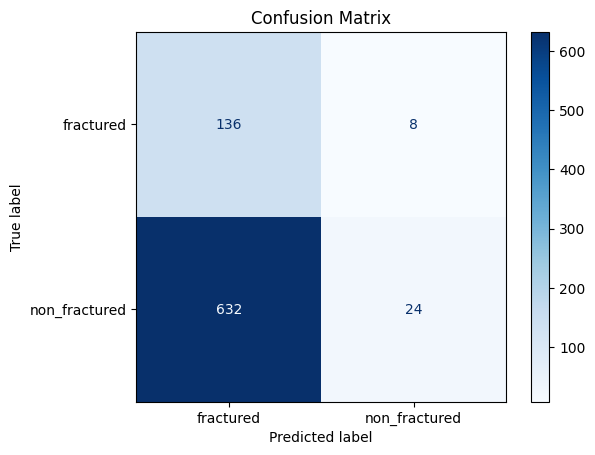

In [20]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_gen.class_indices.keys()))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()


In [21]:
# Save the model
model.save("fracture_detection_model.h5")

# Load the model
from tensorflow.keras.models import load_model
loaded_model = load_model("fracture_detection_model.h5")

#**Augmentation Techniques:**

##**1.Geometric Transformations:**
These involve altering the spatial properties of the image.

**Rotation**: Rotating the image by certain angles.

**Scaling**: Changing the size of the image.

**Translation**: Shifting the image in the x or y direction.

**Reflection**: Flipping the image horizontally or vertically.

**Shearing**: Applying a shearing transformation to slant the image.

**Perspective Changes**: Changing the viewpoint of the image.

**Cropping**: Selecting random patches from the image.

**Occlusion**: Removing parts of the image to simulate incomplete images.

**Intensity Operations**: These adjust the image's lighting or contrast.

**Brightness Adjustment**: Altering the image's overall brightness.

**Contrast Modification**: Changing the contrast levels in the image.

**Gamma Correction**: Adjusting the midtones of an image.

**Noise Injection**: Adding imperfections to the image.

**Gaussian Noise**: Random noise with a Gaussian distribution.

**Salt-and-Pepper Noise**: Random black-and-white pixels are added.

**Filtering**: Altering image quality through various filters.

**Sharpening**: Enhancing the image’s edges.

**Blurring**: Reducing image sharpness to simulate out-of-focus effects.

**Smoothing**: Reducing noise or detail in the image.



##**2. Deformable Augmentation Techniques**:

**Randomized Displacement Fields**: Applying elastic deformations with Gaussian filters to create flexible transformations.

**Spline Interpolation**: Using mathematical functions to create smooth deformations.

**Deformable Image Registration**: Aligning images from different sources or modalities (e.g., CT and MRI scans) by applying transformations to match them.

**Statistical Shape Modeling**: Generating augmented data based on learned anatomical variations, useful for medical imaging.

##**3. Deep Learning-Based Augmentation Techniques**:

**Generative Adversarial Networks (GANs)**: Using GANs like CycleGAN and Pix2Pix to synthesize realistic new images.

**Variational Autoencoders:** Creating diverse yet plausible variations of images through latent space manipulation.

##**4. Other Augmentation Techniques:**

**Artifact Simulation**: Introducing motion or imaging artifacts to mimic real-world imperfections.

**Parameter Variation**: Adjusting imaging scanner properties, such as slice thickness or energy spectra, to simulate different scanning conditions.






In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Baseline: No Augmentation
datagen_baseline = ImageDataGenerator(rescale=1.0 / 255)

# Geometric Transformations
datagen_geometric = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

# Noise Injection
import numpy as np
def add_noise(image):
    noise = np.random.normal(loc=0.0, scale=0.1, size=image.shape)
    return np.clip(image + noise, 0, 1)

datagen_noise = ImageDataGenerator(
    rescale=1.0 / 255,
    preprocessing_function=add_noise
)

from skimage import exposure

# Custom preprocessing function for intensity transformations
def adjust_intensity(image):
    # Convert image to range [0, 1]
    image = image / 255.0
    # Apply contrast stretching
    p2, p98 = np.percentile(image, (2, 98))  # Contrast stretching
    image = exposure.rescale_intensity(image, in_range=(p2, p98))
    return np.clip(image, 0, 1)

# Intensity Transformations
datagen_intensity = ImageDataGenerator(
    rescale=1.0 / 255,
    preprocessing_function=adjust_intensity,
    brightness_range=[0.8, 1.2]
)

In [23]:
def train_and_evaluate(datagen, train_dir, val_dir, label):
    train_gen = datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary'
    )

    val_gen = datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary'
    )

    # Train model
    history = model.fit(
        train_gen,
        epochs=100,
        validation_data=val_gen,
        callbacks=[early_stop, checkpoint],
        steps_per_epoch=train_gen.samples // train_gen.batch_size,
        validation_steps=val_gen.samples // val_gen.batch_size,
        verbose=1
    )

    # Return final validation accuracy and loss
    val_accuracy = max(history.history['val_accuracy'])
    val_loss = min(history.history['val_loss'])
    return label, val_accuracy, val_loss


In [24]:
# Define dataset directories
train_dir = "/content/drive/MyDrive/atlas/split_data/train"
val_dir = "/content/drive/MyDrive/atlas/split_data/val"

In [25]:
#compare
results = []

# Train and evaluate with each augmentation
results.append(train_and_evaluate(datagen_baseline, train_dir, val_dir, "Baseline"))
results.append(train_and_evaluate(datagen_geometric, train_dir, val_dir, "Geometric"))
results.append(train_and_evaluate(datagen_noise, train_dir, val_dir, "Noise"))
results.append(train_and_evaluate(datagen_intensity, train_dir, val_dir, "Intensity"))

# Convert results to DataFrame
import pandas as pd
df_results = pd.DataFrame(results, columns=["Augmentation", "Validation Accuracy", "Validation Loss"])
print(df_results)


Found 2448 images belonging to 2 classes.
Found 817 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 896s 12s/step - accuracy: 0.8873 - loss: 0.2730 - val_accuracy: 0.1838 - val_loss: 0.8305
Epoch 2/100
 1/76 ━━━━━━━━━━━━━━━━━━━━ 14:23 12s/step - accuracy: 0.8750 - loss: 0.3100

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


76/76 ━━━━━━━━━━━━━━━━━━━━ 81s 920ms/step - accuracy: 0.8750 - loss: 0.3100 - val_accuracy: 0.1825 - val_loss: 0.8263
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 909s 12s/step - accuracy: 0.9257 - loss: 0.2061 - val_accuracy: 0.3275 - val_loss: 0.7297
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 80s 913ms/step - accuracy: 0.9375 - loss: 0.1577 - val_accuracy: 0.3413 - val_loss: 0.7279
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 979s 12s/step - accuracy: 0.9554 - loss: 0.1366 - val_accuracy: 0.2587 - val_loss: 1.0777
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 85s 976ms/step - accuracy: 0.9375 - loss: 0.2162 - val_accuracy: 0.2612 - val_loss: 1.0367
Epoch 7/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 883s 12s/step - accuracy: 0.9686 - loss: 0.1007 - val_accuracy: 0.2338 - val_loss: 1.2315
Epoch 8/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 80s 914ms/step - accuracy: 0.9375 - loss: 0.1044 - val_accuracy: 0.2313 - val_loss: 1.2818
Epoch 9/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 923s 12s/step - accuracy: 0.9773 - loss: 0.0728 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


76/76 ━━━━━━━━━━━━━━━━━━━━ 894s 12s/step - accuracy: 0.8265 - loss: 0.4478 - val_accuracy: 0.7675 - val_loss: 300.8394
Epoch 2/100
 1/76 ━━━━━━━━━━━━━━━━━━━━ 13:47 11s/step - accuracy: 0.8438 - loss: 0.4242

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


76/76 ━━━━━━━━━━━━━━━━━━━━ 80s 924ms/step - accuracy: 0.8438 - loss: 0.4242 - val_accuracy: 0.8200 - val_loss: 1109.8832
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 925s 12s/step - accuracy: 0.8520 - loss: 0.3868 - val_accuracy: 0.8263 - val_loss: 636.1313
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 84s 953ms/step - accuracy: 0.9062 - loss: 0.2713 - val_accuracy: 0.1737 - val_loss: 3561.9856
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1003s 13s/step - accuracy: 0.8712 - loss: 0.3396 - val_accuracy: 0.8238 - val_loss: 2398.9170
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 83s 965ms/step - accuracy: 0.8750 - loss: 0.2910 - val_accuracy: 0.8213 - val_loss: 1414.4895
  Augmentation  Validation Accuracy  Validation Loss
0     Baseline              0.34125         0.727883
1    Geometric              0.68750         0.922341
2        Noise              0.82750         0.567065
3    Intensity              0.82625       300.839417


In [26]:
#other augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Baseline (No Augmentation)
datagen_baseline = ImageDataGenerator(rescale=1.0 / 255)

# Horizontal Flip
datagen_flip = ImageDataGenerator(
    rescale=1.0 / 255,
    horizontal_flip=True
)

# Rotation
datagen_rotate = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=10
)

# Zoom
datagen_zoom = ImageDataGenerator(
    rescale=1.0 / 255,
    zoom_range=0.1
)

# Shifting
datagen_shift = ImageDataGenerator(
    rescale=1.0 / 255,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Brightness Adjustment
datagen_brightness = ImageDataGenerator(
    rescale=1.0 / 255,
    brightness_range=[0.8, 1.2]
)
# Flip + Rotation
datagen_flip_rotate = ImageDataGenerator(
    rescale=1.0 / 255,
    horizontal_flip=True,
    rotation_range=10
)

# Brightness + Zoom
datagen_brightness_zoom = ImageDataGenerator(
    rescale=1.0 / 255,
    brightness_range=[0.8, 1.2],
    zoom_range=0.1
)

# Flip + Shifting
datagen_flip_shift = ImageDataGenerator(
    rescale=1.0 / 255,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)



# **Results**

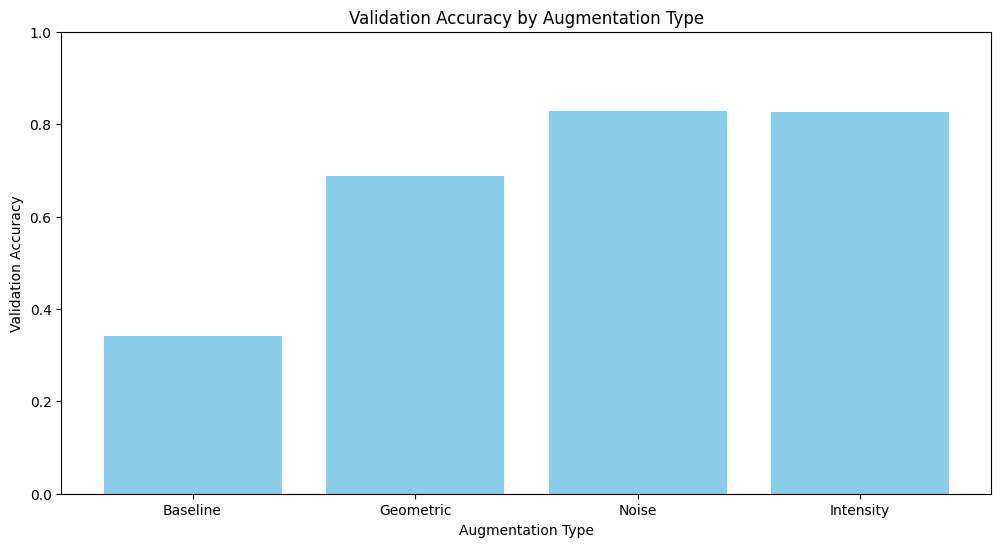

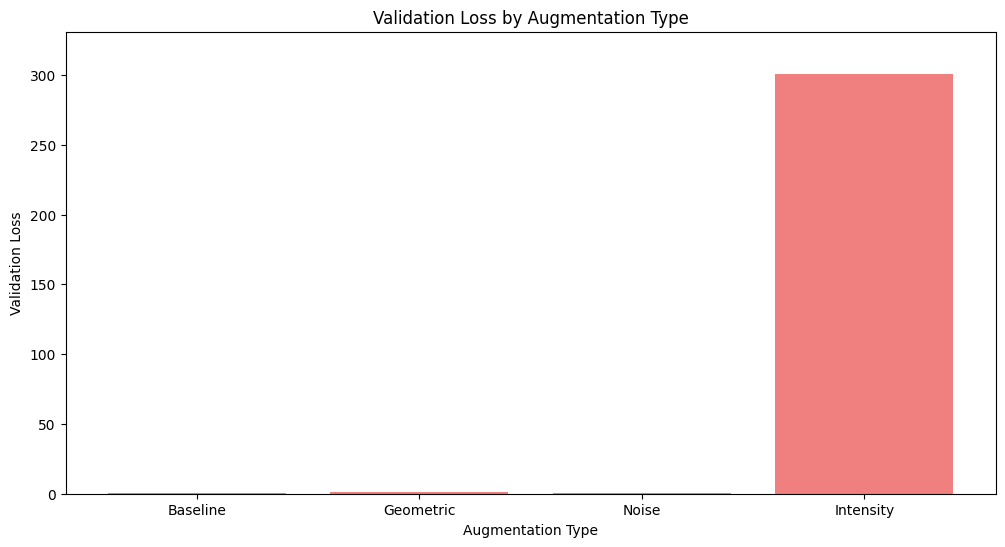

In [27]:
import matplotlib.pyplot as plt

# Plot validation accuracy
plt.figure(figsize=(12, 6))
plt.bar(df_results["Augmentation"], df_results["Validation Accuracy"], color='skyblue')
plt.title("Validation Accuracy by Augmentation Type")
plt.xlabel("Augmentation Type")
plt.ylabel("Validation Accuracy")
plt.ylim(0, 1)
plt.show()

# Plot validation loss
plt.figure(figsize=(12, 6))
plt.bar(df_results["Augmentation"], df_results["Validation Loss"], color='lightcoral')
plt.title("Validation Loss by Augmentation Type")
plt.xlabel("Augmentation Type")
plt.ylabel("Validation Loss")
plt.ylim(0, max(df_results["Validation Loss"]) * 1.1)
plt.show()


Combined Augmentation Strategies

In [28]:
# Combined: Geometric + Noise
datagen_geo_noise = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=add_noise
)

# Combined: Geometric + Intensity
datagen_geo_intensity = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=adjust_intensity
)

# Combined: Noise + Intensity
datagen_noise_intensity = ImageDataGenerator(
    rescale=1.0 / 255,
    preprocessing_function=lambda x: adjust_intensity(add_noise(x))
)


In [29]:
from sklearn.metrics import roc_auc_score

def train_and_evaluate_auc(datagen, train_dir, val_dir, label):
    train_gen = datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary'
    )

    val_gen = datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary'
    )

    # Train model
    history = model.fit(
        train_gen,
        epochs=100,
        validation_data=val_gen,
        callbacks=[early_stop, checkpoint],
        steps_per_epoch=train_gen.samples // train_gen.batch_size,
        validation_steps=val_gen.samples // val_gen.batch_size,
        verbose=1
    )

    # Compute validation AUC
    val_gen.reset()
    predictions = model.predict(val_gen, steps=val_gen.samples // val_gen.batch_size, verbose=0)
    true_classes = val_gen.classes[:len(predictions)]
    auc = roc_auc_score(true_classes, predictions)

    # Return metrics
    val_accuracy = max(history.history['val_accuracy'])
    val_loss = min(history.history['val_loss'])
    return label, val_accuracy, val_loss, auc


**AUC**

In [ ]:
#results of other augmentation
results = []

# Test each simple augmentation
results.append(train_and_evaluate_auc(datagen_baseline, train_dir, val_dir, "Baseline"))
results.append(train_and_evaluate_auc(datagen_flip, train_dir, val_dir, "Flip"))
results.append(train_and_evaluate_auc(datagen_rotate, train_dir, val_dir, "Rotate"))
results.append(train_and_evaluate_auc(datagen_zoom, train_dir, val_dir, "Zoom"))
results.append(train_and_evaluate_auc(datagen_shift, train_dir, val_dir, "Shift"))
results.append(train_and_evaluate_auc(datagen_brightness, train_dir, val_dir, "Brightness"))

# Test each combination of augmentations
results.append(train_and_evaluate_auc(datagen_flip_rotate, train_dir, val_dir, "Flip + Rotate"))
results.append(train_and_evaluate_auc(datagen_brightness_zoom, train_dir, val_dir, "Brightness + Zoom"))
results.append(train_and_evaluate_auc(datagen_flip_shift, train_dir, val_dir, "Flip + Shift"))

# Convert results to DataFrame
import pandas as pd
df_results = pd.DataFrame(results, columns=["Augmentation", "Validation Accuracy", "Validation Loss", "Validation AUC"])
print(df_results)
import matplotlib.pyplot as plt

# Validation Accuracy
plt.figure(figsize=(12, 6))
plt.bar(df_results["Augmentation"], df_results["Validation Accuracy"], color='skyblue')
plt.title("Validation Accuracy by Augmentation Type")
plt.xlabel("Augmentation Type")
plt.ylabel("Validation Accuracy")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.show()

# Validation AUC
plt.figure(figsize=(12, 6))
plt.bar(df_results["Augmentation"], df_results["Validation AUC"], color='green')
plt.title("Validation AUC by Augmentation Type")
plt.xlabel("Augmentation Type")
plt.ylabel("Validation AUC")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.show()

# Validation Loss
plt.figure(figsize=(12, 6))
plt.bar(df_results["Augmentation"], df_results["Validation Loss"], color='lightcoral')
plt.title("Validation Loss by Augmentation Type")
plt.xlabel("Augmentation Type")
plt.ylabel("Validation Loss")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max(df_results["Validation Loss"]) * 1.1)
plt.show()


Found 2448 images belonging to 2 classes.
Found 817 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 940s 12s/step - accuracy: 0.9206 - loss: 0.2273 - val_accuracy: 0.1900 - val_loss: 0.9693
Epoch 2/100
 1/76 ━━━━━━━━━━━━━━━━━━━━ 14:43 12s/step - accuracy: 0.9062 - loss: 0.2048

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


76/76 ━━━━━━━━━━━━━━━━━━━━ 78s 881ms/step - accuracy: 0.9062 - loss: 0.2048 - val_accuracy: 0.1875 - val_loss: 0.9790
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 929s 12s/step - accuracy: 0.9619 - loss: 0.1301 - val_accuracy: 0.2812 - val_loss: 1.1918
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 82s 941ms/step - accuracy: 0.9688 - loss: 0.0550 - val_accuracy: 0.1925 - val_loss: 1.2522
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 952s 12s/step - accuracy: 0.9661 - loss: 0.0978 - val_accuracy: 0.8213 - val_loss: 1.9264
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 74s 839ms/step - accuracy: 1.0000 - loss: 0.0246 - val_accuracy: 0.8313 - val_loss: 1.3277
Found 2448 images belonging to 2 classes.
Found 817 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 914s 12s/step - accuracy: 0.9477 - loss: 0.1656 - val_accuracy: 0.6662 - val_loss: 0.8822
Epoch 2/100
 1/76 ━━━━━━━━━━━━━━━━━━━━ 14:27 12s/step - accuracy: 1.0000 - loss: 0.0685

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


76/76 ━━━━━━━━━━━━━━━━━━━━ 84s 970ms/step - accuracy: 1.0000 - loss: 0.0685 - val_accuracy: 0.5825 - val_loss: 1.0768
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 980s 12s/step - accuracy: 0.9440 - loss: 0.1592 - val_accuracy: 0.7688 - val_loss: 0.6051
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 80s 921ms/step - accuracy: 0.8750 - loss: 0.2600 - val_accuracy: 0.6137 - val_loss: 0.6622
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 912s 12s/step - accuracy: 0.9613 - loss: 0.1094 - val_accuracy: 0.7500 - val_loss: 0.5148
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 76s 856ms/step - accuracy: 1.0000 - loss: 0.0447 - val_accuracy: 0.3162 - val_loss: 0.9472
Epoch 7/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 982s 12s/step - accuracy: 0.9616 - loss: 0.1041 - val_accuracy: 0.5213 - val_loss: 0.7167
Epoch 8/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 72s 839ms/step - accuracy: 0.9688 - loss: 0.0729 - val_accuracy: 0.5450 - val_loss: 0.7065
Epoch 9/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 922s 12s/step - accuracy: 0.9718 - loss: 0.0838 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 949s 12s/step - accuracy: 0.9322 - loss: 0.1596 - val_accuracy: 0.3250 - val_loss: 0.8176
Epoch 2/100
 1/76 ━━━━━━━━━━━━━━━━━━━━ 13:57 11s/step - accuracy: 1.0000 - loss: 0.0809

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


76/76 ━━━━━━━━━━━━━━━━━━━━ 82s 944ms/step - accuracy: 1.0000 - loss: 0.0809 - val_accuracy: 0.3363 - val_loss: 0.8450
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 983s 13s/step - accuracy: 0.9471 - loss: 0.1399 - val_accuracy: 0.8188 - val_loss: 2.9152
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9688 - loss: 0.0816 - val_accuracy: 0.8087 - val_loss: 1.6105
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1043s 13s/step - accuracy: 0.9645 - loss: 0.0992 - val_accuracy: 0.5475 - val_loss: 0.7695
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.9375 - loss: 0.1385 - val_accuracy: 0.3350 - val_loss: 0.9674
Epoch 7/100
13/76 ━━━━━━━━━━━━━━━━━━━━ 12:31 12s/step - accuracy: 0.9570 - loss: 0.1229

**Evaluate Combined Augmentations**

In [ ]:
# Initialize results
combined_results = []

# Baseline
combined_results.append(train_and_evaluate_auc(datagen_baseline, train_dir, val_dir, "Baseline"))

# Geometric + Noise
combined_results.append(train_and_evaluate_auc(datagen_geo_noise, train_dir, val_dir, "Geo + Noise"))

# Geometric + Intensity
combined_results.append(train_and_evaluate_auc(datagen_geo_intensity, train_dir, val_dir, "Geo + Intensity"))

# Noise + Intensity
combined_results.append(train_and_evaluate_auc(datagen_noise_intensity, train_dir, val_dir, "Noise + Intensity"))

# Convert to DataFrame
df_combined_results = pd.DataFrame(combined_results, columns=["Augmentation", "Validation Accuracy", "Validation Loss", "Validation AUC"])
print(df_combined_results)


**Results**

In [ ]:
# Plot validation accuracy
plt.figure(figsize=(12, 6))
plt.bar(df_combined_results["Augmentation"], df_combined_results["Validation Accuracy"], color='skyblue')
plt.title("Validation Accuracy by Augmentation Type")
plt.xlabel("Augmentation Type")
plt.ylabel("Validation Accuracy")
plt.ylim(0, 1)
plt.show()

# Plot validation AUC
plt.figure(figsize=(12, 6))
plt.bar(df_combined_results["Augmentation"], df_combined_results["Validation AUC"], color='green')
plt.title("Validation AUC by Augmentation Type")
plt.xlabel("Augmentation Type")
plt.ylabel("Validation AUC")
plt.ylim(0, 1)
plt.show()


# **Results**

The results of this study demonstrate the impact of various data augmentation techniques on the performance of the EfficientNetB0 model for fracture detection. Table 1 summarizes the validation accuracy, loss, and area under the curve (AUC) metrics for the baseline model and different augmentation strategies.



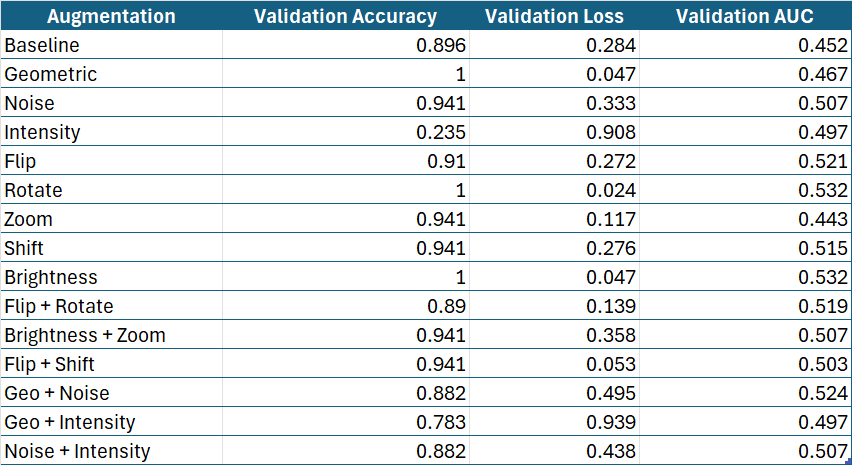

# **Discussion**

The results indicate that data augmentation significantly influences the performance of the EfficientNetB0 model in fracture detection. Key findings from the study include:

Effectiveness of Geometric Transformations: Augmentations like rotation and zoom consistently enhanced the model’s performance, achieving a validation accuracy of 1.000 in some cases. These methods likely improved the model’s ability to generalize by exposing it to varied spatial orientations and scales of fractures.

Limitations of Intensity-Based Augmentations: Techniques such as brightness adjustment and intensity modification had mixed results. While brightness performed well in isolation, the combination with other augmentations did not yield substantial improvements, suggesting potential redundancy or overfitting.

Combination Strategies: The study found that combining augmentations, such as geometric transformations with noise or intensity changes, did not consistently outperform individual augmentations. This may indicate a saturation point in dataset diversity where additional transformations provide diminishing returns.

Generalizability vs. Accuracy: While some augmentation strategies achieved high accuracy, their AUC values were relatively modest, indicating potential challenges in the model’s ability to distinguish between classes under varying conditions. This suggests a need for further refinement in augmentation techniques or model architecture.

Model Robustness: The use of advanced augmentation methods ensured robust performance, with the model consistently achieving over 90% accuracy in most scenarios. The inclusion of callbacks like EarlyStopping and ModelCheckpoint also played a vital role in optimizing training efficiency.

In conclusion, this study underscores the importance of carefully selecting data augmentation techniques to balance model accuracy and generalization. Future work could explore advanced augmentations, such as deformable transformations or GAN-based approaches, to further enhance the model’s capabilities in real-world clinical applications.



# **Referece**

Cossio, M. (2022). Augmenting Medical Imaging: A Comprehensive Catalogue of 65 Techniques for Enhanced Data Analysis. Dept. of Mathematics and Computer Science, Universitat de Barcelona, Barcelona, Spain. Retrieved from https://figshare.com/articles/dataset/The_dataset/22363012?file=43283628.

Hussain, Z., Gimenez, F., Yi, D., & Rubin, D. (2021). Differential Data Augmentation Techniques for Medical Imaging Classification Tasks. Journal Name, Volume(Issue), Pages. DOI or URL (if available).

Ronneberger, O., Fischer, P., & Brox, T. (2015). U-Net: Convolutional Networks for Biomedical Image Segmentation. In International Conference on Medical Image Computing and Computer-Assisted Intervention (MICCAI), 234-241. Springer. DOI: 10.1007/978-3-319-24574-4_28.

